Implement a histogram equalization function and apply it on the images "Questionario-3-Imagem-1.tif" and "Questionario-3-Imagem-2.tif"

In [97]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

(500, 500, 3)


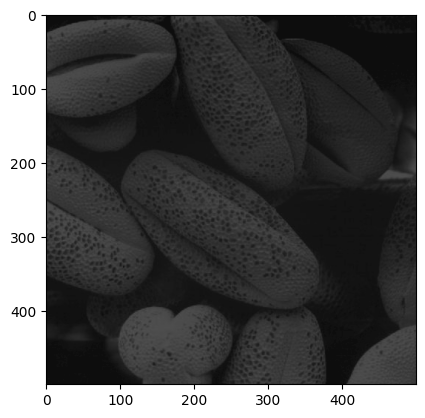

In [98]:
filename = "Questionario-3-Imagem-2"
full_name = filename+".tif"
img = cv.imread(full_name)

print(img.shape)
plt.imshow(img)
plt.show()

In [99]:
def histogram(image):
    if len(image.shape) < 3:
        n_channels = 1
    else:
        n_channels = image.shape[2]
    
    hist = np.zeros((256,n_channels),np.uint32)
    
    for channel in range(n_channels-1):
        for intensity in image[:,:,channel].flatten():
            hist[intensity, channel] += 1
        
    return hist

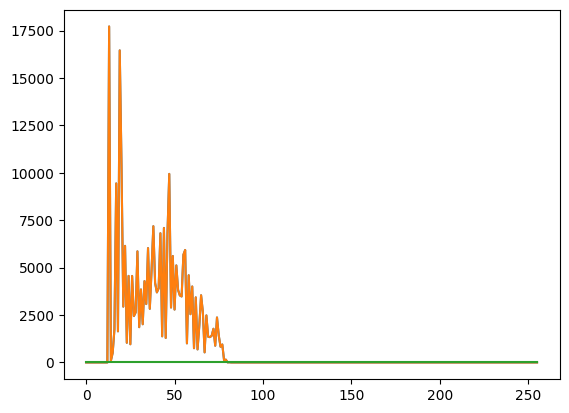

In [100]:
hist = histogram(img)
plt.plot(hist)
plt.show()

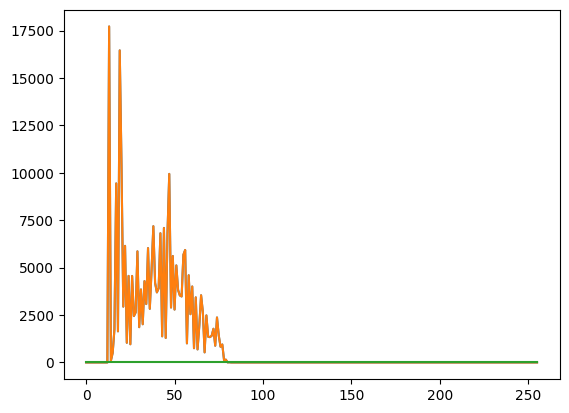

In [101]:
plt.plot(hist)
plt.savefig(f'{filename}_histogram.png')
plt.show()

In [102]:
def equalize_histogram(image):
    eq_img = np.zeros_like(image)

    hist = histogram(image)
    
    cdf = np.zeros_like(hist)
    
    for channel in range(hist.shape[1]):
        # calculating cdf
        cdf[0,channel] = hist[0,channel]
        for intensity in range(1,hist.shape[0]):
            cdf[intensity,channel] = hist[intensity,channel] + cdf[intensity-1,channel]

        cdf_min = 0
        idx = 0
        # searching for first non-zero cdf value
        while cdf_min == 0 and idx < 256:
            cdf_min = cdf[idx, channel]
            idx += 1
        
        # applying equalization
        div = cdf[255,channel] - cdf_min
        if div > 0:
            for j in range(image.shape[0]):
                for i in range(image.shape[1]):
                    pixel_intensity = image[j,i,channel]
                    if cdf[pixel_intensity,channel] > 0:
                        num = cdf[pixel_intensity,channel]-cdf_min
                        eq_img[j,i,channel] = int(num*(256-2)/div)+1
    
    return eq_img

(500, 500, 3)


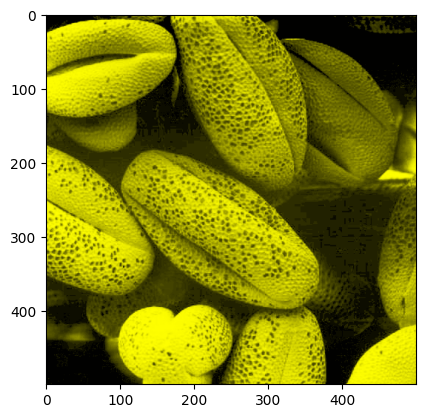

In [103]:
eq_img = equalize_histogram(img)
print(eq_img.shape)
plt.imsave(f'{filename}_equalized.png',eq_img)
plt.imshow(eq_img)
plt.show()


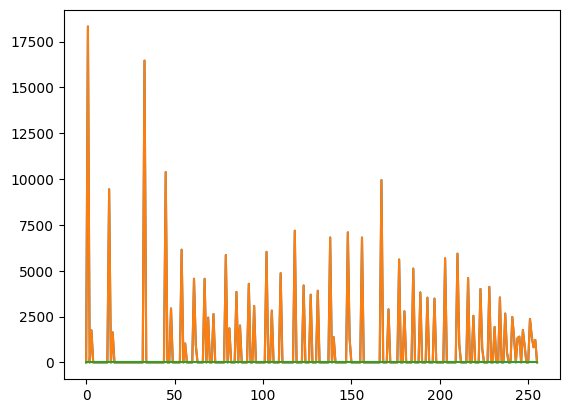

In [104]:
hist2 = histogram(eq_img)

plt.plot(hist2)
plt.savefig(f'{filename}_equalized_histogram.png')
plt.show()